# Project 3
## Design a particle detector

In [7]:
# preamble
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib_inline

In [38]:
# read in experiment output
e_energy = pd.read_csv("output_nt_Energy_electrons.csv",comment='#',
names=['Generated', 'Magnetic field',
'Detector1', 'Detector2', 'Detector3', 'Detector4', 'Detector5',
'Detector6', 'Detector7', 'Detector8', 'Detector9', 'Detector10'] )
gam_energy = pd.read_csv("output_nt_Energy_photons.csv", comment='#',
names=['Generated', 'Magnetic field',
'Detector1', 'Detector2', 'Detector3', 'Detector4', 'Detector5',
'Detector6', 'Detector7', 'Detector8', 'Detector9', 'Detector10'])

In [59]:
e_energy

,Generated,Magnetic field,Detector1,Detector2,Detector3,Detector4,Detector5,Detector6,Detector7,Detector8,Detector9,Detector10
0,200,0.00000,11.177000,0.421984,0.415475,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,0.0
1,200,0.00000,4.321430,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,0.0
2,200,0.00000,1.200870,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,0.0
3,200,0.00000,11.840400,0.162533,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,0.0
4,200,0.00000,0.100113,1.137460,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1190,0.00009,0.494712,44.857100,1.223910,1.076910,0.000000,0.000000,0.00000,0.00000,0.0,0.0
9996,1190,0.00009,1.835640,19.352600,1.253340,0.000000,0.259256,0.000000,0.00000,2.51151,0.0,0.0
9997,1190,0.00009,6.445250,26.341300,0.474670,0.392488,0.000000,0.000000,0.00000,0.00000,0.0,0.0
9998,1190,0.00009,0.002473,59.435200,8.918520,0.203491,0.456939,0.391473,3.80191,0.00000,0.0,0.0


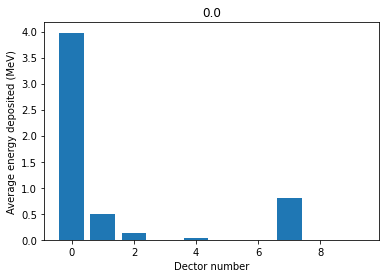

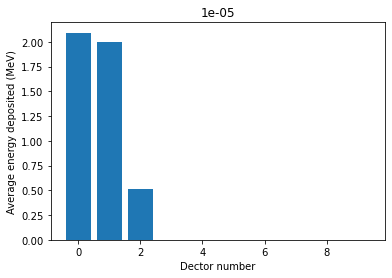

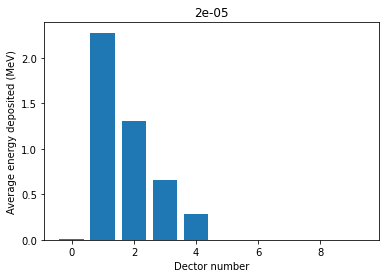

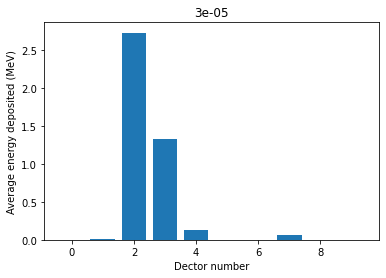

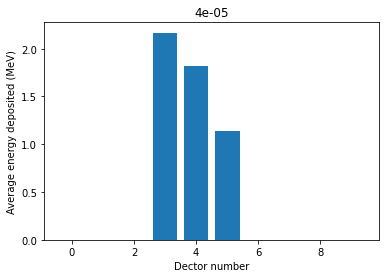

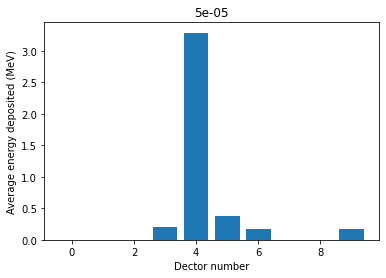

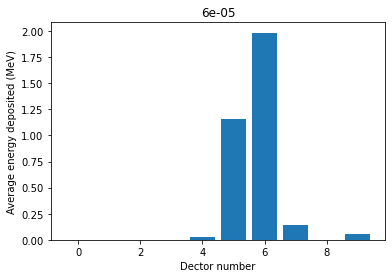

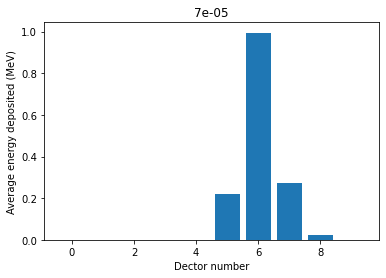

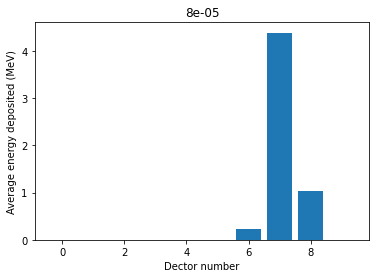

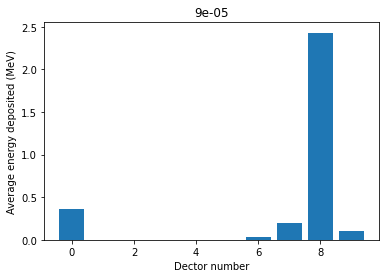

In [57]:
# Plotting the average amount of energy deposited at each detector as the magnetic field is increased
# at 200 MeV

e_energy_200 = e_energy[e_energy.Generated == 200]

# average amount of energy deposited at each detector for each magnetic field strength
mag_field_strengths = e_energy_200['Magnetic field'].unique()
av_energy = []
for strength in mag_field_strengths:
    av_energy.append([e_energy_200[e_energy_200['Magnetic field'] == strength][f"Detector{i}"].mean() for i in range(1,11)])
for i, energy in enumerate(av_energy):
    plt.bar(range(len(energy)), energy)
    plt.title(mag_field_strengths[i])
    plt.xlabel("Dector number")
    plt.ylabel("Average energy deposited (MeV)")
    plt.show()


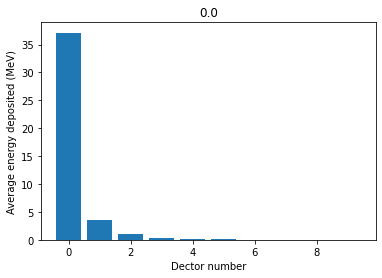

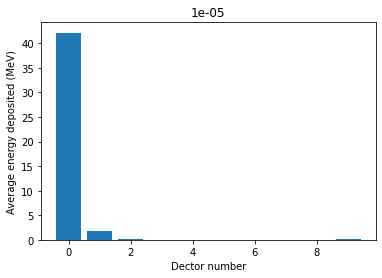

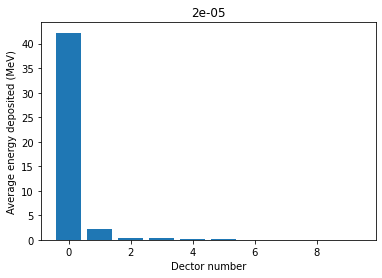

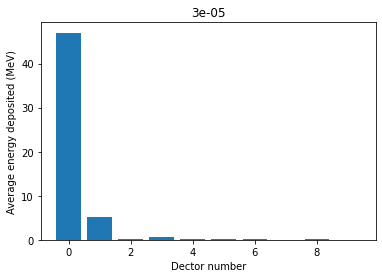

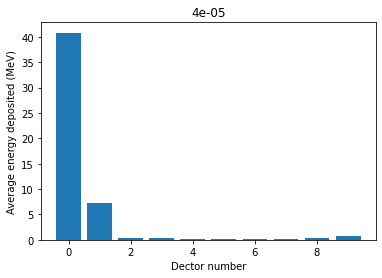

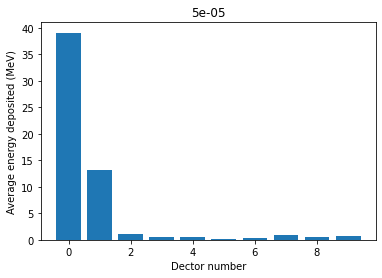

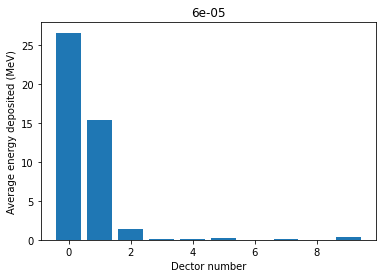

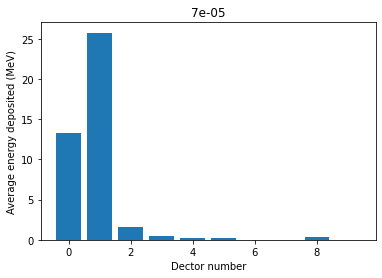

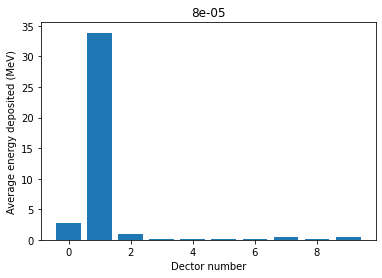

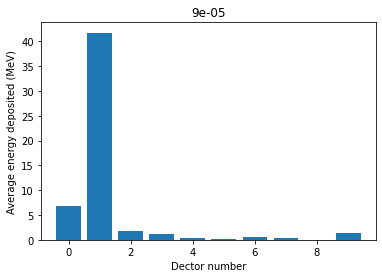

In [58]:
# Same again but this time with 1190 MeV

e_energy_1190 = e_energy[e_energy.Generated == 1190]

# average amount of energy deposited at each detector for each magnetic field strength
mag_field_strengths = e_energy_1190['Magnetic field'].unique()
av_energy = []
for strength in mag_field_strengths:
    av_energy.append([e_energy_1190[e_energy_1190['Magnetic field'] == strength][f"Detector{i}"].mean() for i in range(1,11)])
for i, energy in enumerate(av_energy):
    plt.bar(range(len(energy)), energy)
    plt.title(mag_field_strengths[i])
    plt.xlabel("Dector number")
    plt.ylabel("Average energy deposited (MeV)")
    plt.show()

Notice that, for 200 MeV, the increase in magnetic field results in a clear deflection of the electron from the horizontal. While, for the much higher energy, the difference is less obvious.

<AxesSubplot:xlabel='Magnetic field'>

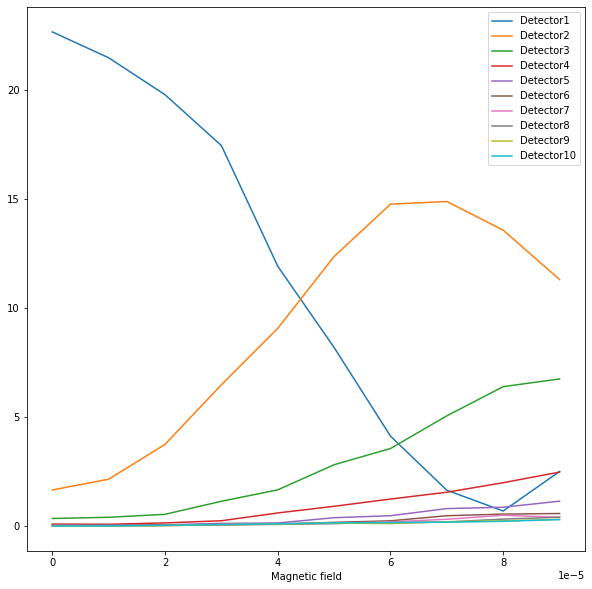

In [83]:
e_energy.groupby(['Magnetic field']).mean().drop('Generated',axis=1).plot(figsize=(10,10))

This plot shows the average energy deposited at each detector as the magnetic field is increased. Interesting features include the uptick in detector 1 at 0.09 tesla, where the energy deposited at detector 1 increases. This shows that, for very high energies, the electrons travel further before deflecting and that high energy electrons will be more difficult to distinguish from photons.

<AxesSubplot:xlabel='Magnetic field'>

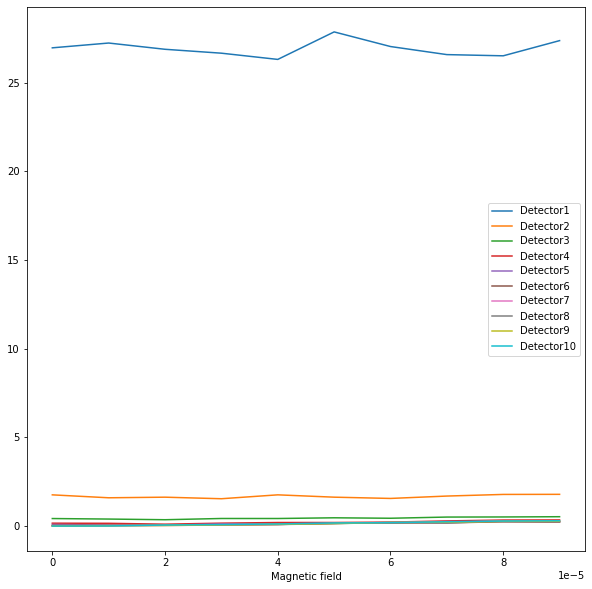

In [86]:
# creating the graph above for photons
gam_energy.groupby(['Magnetic field']).mean().drop('Generated',axis=1).plot(figsize=(10,10))

As expected, the amount of energy deposited by the photons for each magnetic field strength is roughly the same and is almost entirely deposited into the first detector as the photons are not deflected by the magnetic field.

In [88]:
# attempt to recover the energy from events where the magnetic field is turned off
e_energy_nomag = e_energy[e_energy['Magnetic field']==0]


,Generated,Magnetic field,Detector1,Detector2,Detector3,Detector4,Detector5,Detector6,Detector7,Detector8,Detector9,Detector10
0,200,0.0,11.177000,0.421984,0.415475,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,200,0.0,4.321430,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,200,0.0,1.200870,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,200,0.0,11.840400,0.162533,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,200,0.0,0.100113,1.137460,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9905,1190,0.0,54.541200,0.614469,0.112986,1.079060,0.0,0.000000,0.0,0.0,0.0,0.0
9906,1190,0.0,40.398700,11.931700,0.101196,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
9907,1190,0.0,40.138600,2.503150,1.791980,1.343510,0.0,0.000000,0.0,0.0,0.0,0.0
9908,1190,0.0,31.229500,0.442474,0.039398,0.000000,0.0,0.163568,0.0,0.0,0.0,0.0
